In [2]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\suhas\Downloads\india_job_market_dataset.csv")
df

,Job ID,Job Title,Company Name,Job Location,Job Type,Salary Range,Experience Required,Posted Date,Application Deadline,Job Portal,Number of Applicants,Education Requirement,Skills Required,Remote/Onsite,Company Size
0,JOB1,Software Engineer,Amazon,Ahmedabad,Full-time,5-8 LPA,2-5 years,2025-01-16,2025-01-25,LinkedIn,23,PhD,"C++, SQL, Python",Remote,Small (1-50)
1,JOB2,Marketing Executive,Infosys,Ahmedabad,Internship,5-8 LPA,2-5 years,2024-12-25,2025-01-19,Indeed,462,MBA,"SQL, C++, Python",Remote,Large (500+)
2,JOB3,Financial Analyst,Deloitte,Jaipur,Contract,20+ LPA,5-10 years,2025-01-22,2025-01-29,Naukri.com,430,M.Tech,"Machine Learning, Excel, React",Remote,Large (500+)
3,JOB4,Business Analyst,Amazon,Delhi,Full-time,20+ LPA,2-5 years,2025-01-07,2025-02-06,LinkedIn,387,B.Tech,"Machine Learning, Python, SQL",Hybrid,Small (1-50)
4,JOB5,Software Engineer,Infosys,Delhi,Full-time,12-20 LPA,10+ years,2024-12-26,2025-01-08,Indeed,199,MBA,"UI/UX, C++, Java",Onsite,Small (1-50)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,JOB19996,Marketing Executive,Deloitte,Pune,Full-time,5-8 LPA,2-5 years,2025-01-13,2025-02-05,Indeed,171,PhD,"Machine Learning, Python, AWS",Remote,Small (1-50)
19996,JOB19997,Business Analyst,Accenture,Bangalore,Internship,20+ LPA,0-2 years,2025-01-08,2025-01-27,LinkedIn,482,MBA,"Digital Marketing, React, Machine Learning",Onsite,Medium (51-500)
19997,JOB19998,Graphic Designer,Wipro,Jaipur,Part-time,5-8 LPA,5-10 years,2024-12-26,2025-01-16,Naukri.com,319,PhD,"Machine Learning, Excel, Digital Marketing",Onsite,Small (1-50)
19998,JOB19999,Sales Representative,Infosys,Kolkata,Internship,12-20 LPA,2-5 years,2025-01-20,2025-02-09,Naukri.com,178,M.Tech,"Excel, C++, React",Onsite,Large (500+)


What are the most in-demand job roles? 

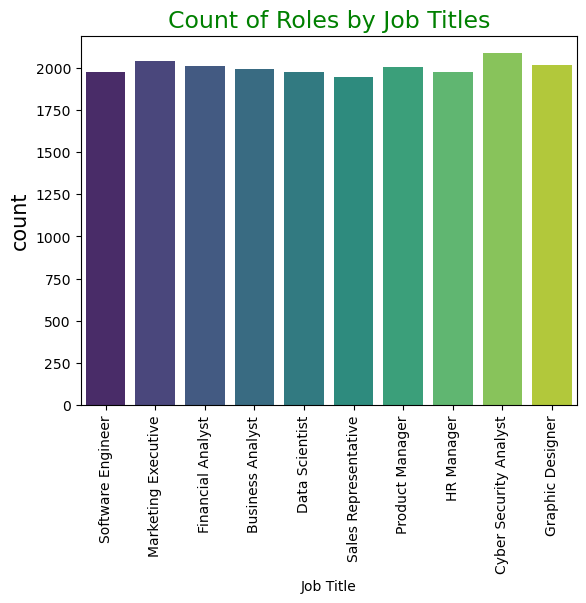

In [24]:
#plt.figure(figsize=(12,4))
#countplot= allows to count the values
sns.countplot(x= 'Job Title', data = df, hue="Job Title", palette='viridis')
plt.xticks(rotation = 90) #for stopping the overlapping od labels
plt.ylabel("Jib Title", fontsize = 15)
plt.ylabel("count", fontsize = 15)
plt.title("Count of Roles by Job Titles", fontsize = 17, color = "green")
plt.show()

Which companies are posting the most job openings?

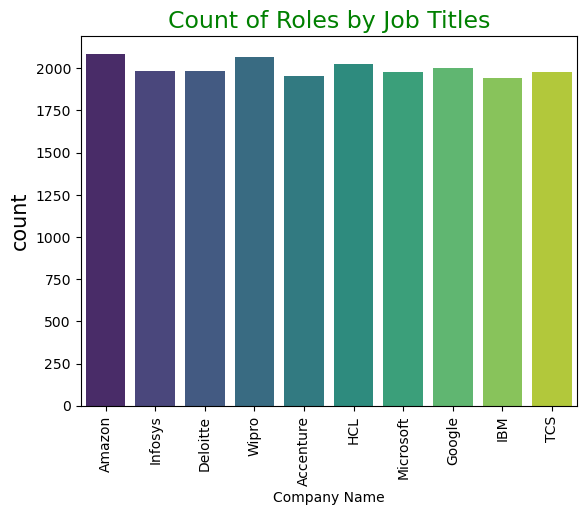

In [84]:
sns.countplot(x= 'Company Name', data = df, hue="Company Name", palette='viridis')
plt.xticks(rotation = 90) #for stopping the overlapping od labels
plt.ylabel("Jib Title", fontsize = 15)
plt.ylabel("count", fontsize = 15)
plt.title("Count of Roles by Job Titles", fontsize = 17, color = "green")
plt.show()

            Job ID
Job Type          
Contract      4823
Full-time     4981
Internship    5085
Part-time     5111


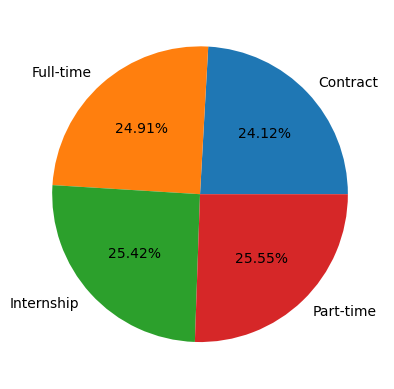

In [80]:
gb = df.groupby("Job Type").agg({"Job ID":"count"})#to create summary like pivot table
print(gb)
colors = {"red", "yellow", "purple", "green"}
plt.pie(gb["Job ID"], labels = gb.index, autopct = "%1.2f%%")
plt.show()

What is the distribution of salary ranges across different job roles?

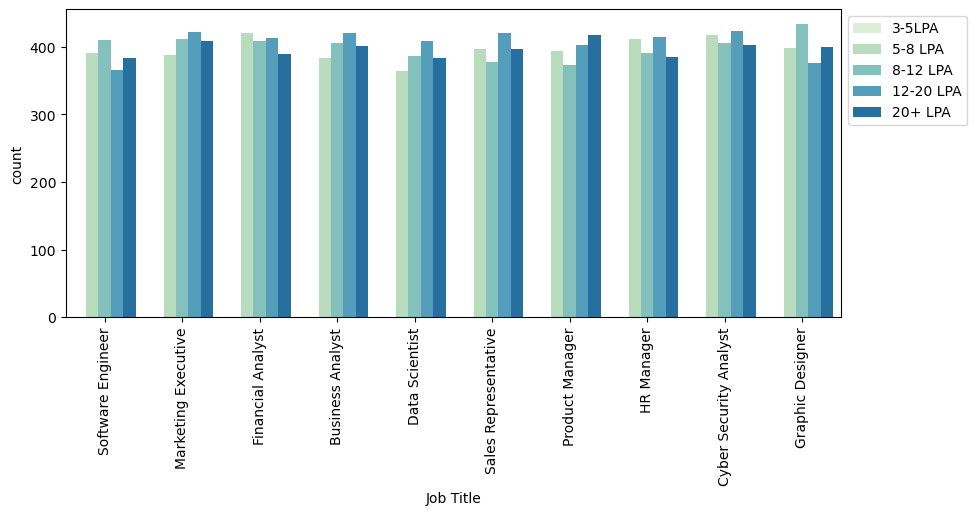

In [86]:
plt.figure(figsize = (10,4)) #to change the size of the figure
sns.countplot(x = "Job Title", data = df, hue = "Salary Range", palette = "GnBu", hue_order = ["3-5LPA", "5-8 LPA", "8-12 LPA", "12-20 LPA", "20+ LPA"])
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor = (1,1)) #bbox is used to keep the legend outside the graph
plt.show()

What is the average experience required for different job types? 

C:\Users\suhas\AppData\Local\Temp\ipykernel_1540\1304610454.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_experience_by_job_type.index, y=avg_experience_by_job_type.values, palette="viridis")


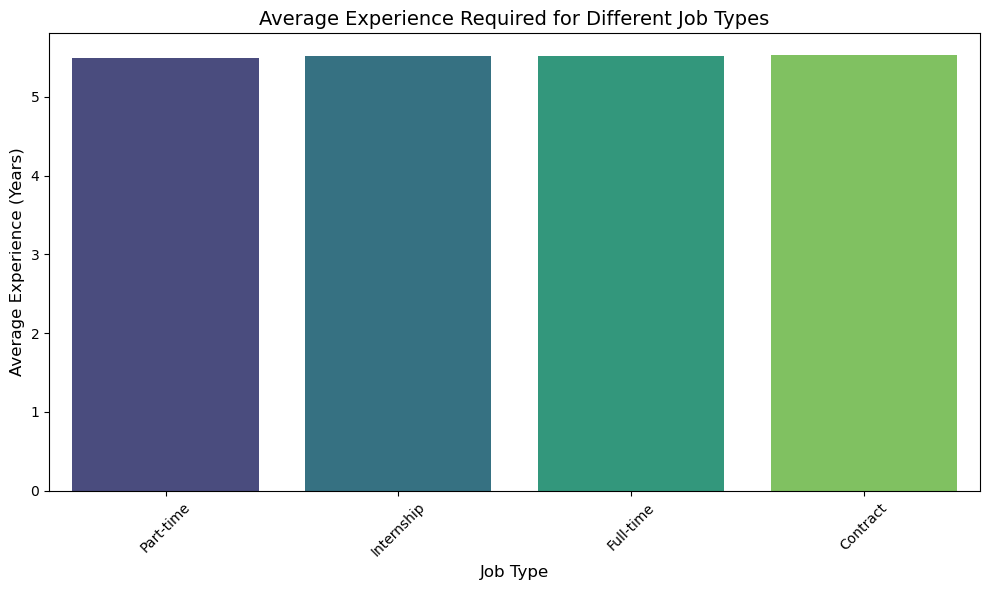

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract average experience
def extract_avg_experience(exp_str):
    exp_str = exp_str.replace("years", "").replace("year", "").strip()
    if "10+" in exp_str:
        return 10  # Considering 10+ years as 10 for simplicity
    elif "-" in exp_str:
        low, high = map(int, exp_str.split('-'))
        return (low + high) / 2
    return int(exp_str.split()[0])  # Single year like "5"

df['Avg Experience (Years)'] = df['Experience Required'].apply(extract_avg_experience)

# Calculate average experience by Job Type
avg_experience_by_job_type = df.groupby('Job Type')['Avg Experience (Years)'].mean().sort_values()

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_experience_by_job_type.index, y=avg_experience_by_job_type.values, palette="viridis")
plt.title('Average Experience Required for Different Job Types', fontsize=14)
plt.xlabel('Job Type', fontsize=12)
plt.ylabel('Average Experience (Years)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Which salary range has the highest number of job postings?

C:\Users\suhas\AppData\Local\Temp\ipykernel_1540\1919443522.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=salary_range_counts.index, y=salary_range_counts.values, palette="viridis")


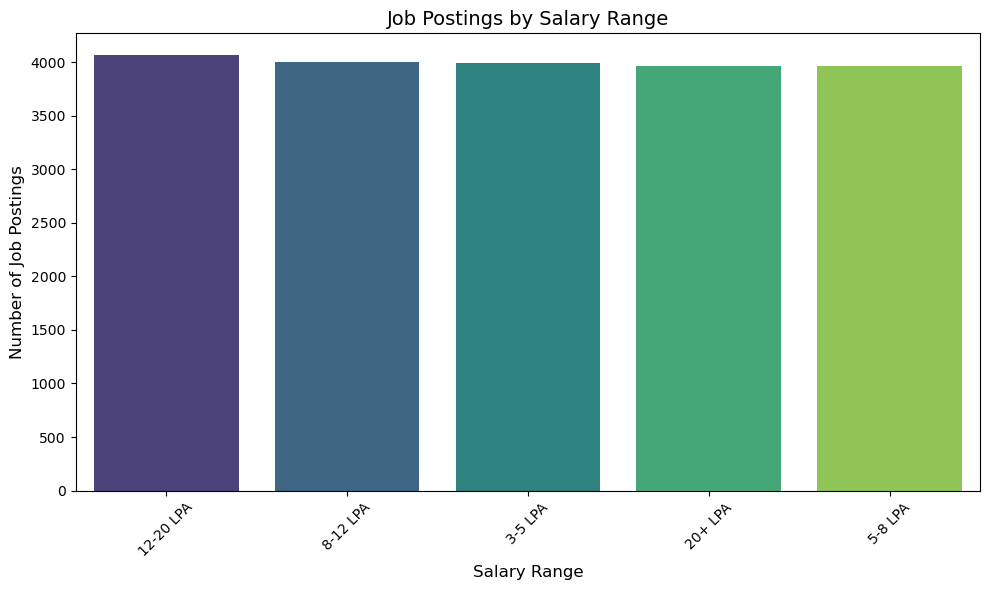

In [94]:
# Count the number of job postings for each Salary Range
salary_range_counts = df['Salary Range'].value_counts()

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=salary_range_counts.index, y=salary_range_counts.values, palette="viridis")
plt.title('Job Postings by Salary Range', fontsize=14)
plt.xlabel('Salary Range', fontsize=12)
plt.ylabel('Number of Job Postings', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Which cities have the highest number of job opportunities?

C:\Users\suhas\AppData\Local\Temp\ipykernel_1540\3212375202.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_location_counts.head(10).index, y=job_location_counts.head(10).values, palette="viridis")


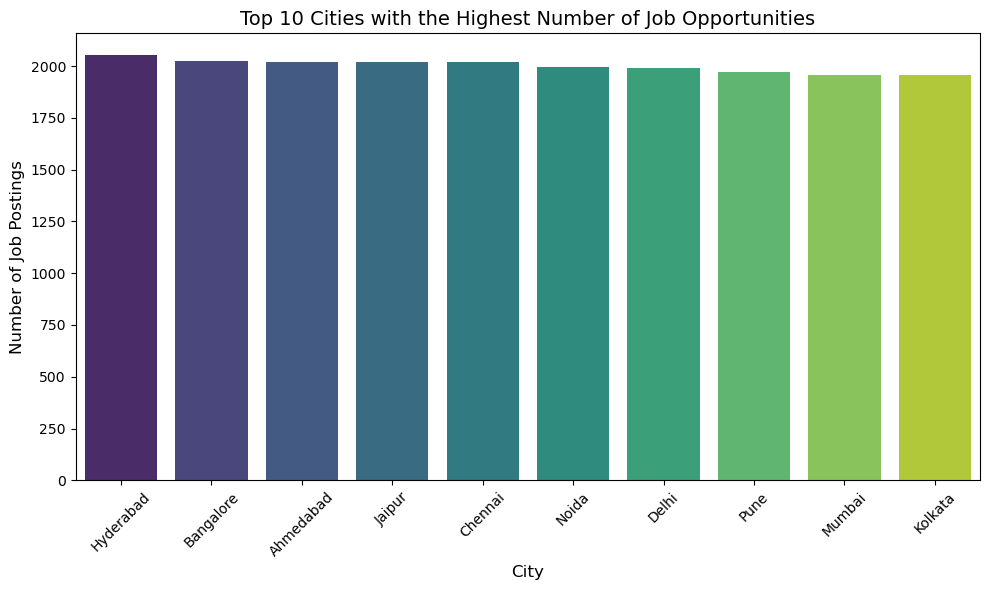

In [98]:
# Count job postings by location
job_location_counts = df['Job Location'].value_counts()

# Plot the top 10 cities
plt.figure(figsize=(10, 6))
sns.barplot(x=job_location_counts.head(10).index, y=job_location_counts.head(10).values, palette="viridis")
plt.title('Top 10 Cities with the Highest Number of Job Opportunities', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Job Postings', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


What are the most common job types in each location?

In [102]:
# Group data by Job Location and Job Type
common_job_types = df.groupby(['Job Location', 'Job Type']).size().reset_index(name='Count')

# Get the most common job type for each location
most_common_job_types = common_job_types.loc[common_job_types.groupby('Job Location')['Count'].idxmax()]

# Display results
print(most_common_job_types)


   Job Location    Job Type  Count
3     Ahmedabad   Part-time    525
6     Bangalore  Internship    550
11      Chennai   Part-time    547
14        Delhi  Internship    503
17    Hyderabad   Full-time    531
22       Jaipur  Internship    521
25      Kolkata   Full-time    510
31       Mumbai   Part-time    530
34        Noida  Internship    502
38         Pune  Internship    505


Which skills are most frequently required in job postings?

C:\Users\suhas\AppData\Local\Temp\ipykernel_1540\996896617.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(skills), y=list(counts), palette="viridis")


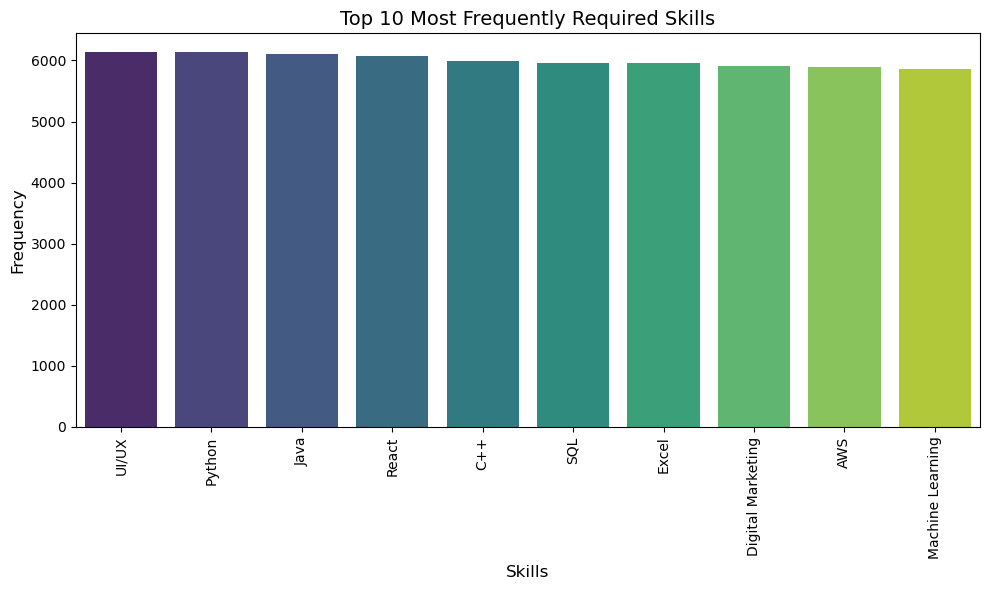

In [108]:
from collections import Counter

#Split and count all skills
all_skills = df['Skills Required'].str.split(', ')
flat_skills = [skill for sublist in all_skills for skill in sublist]

# Count occurrences of each skill
skill_counts = Counter(flat_skills)
most_common_skills = skill_counts.most_common(10)  # Top 10 skills

# Prepare data for visualization
skills, counts = zip(*most_common_skills)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=list(skills), y=list(counts), palette="viridis")
plt.title('Top 10 Most Frequently Required Skills', fontsize=14)
plt.xlabel('Skills', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


What is the correlation between educational qualifications and salary ranges?

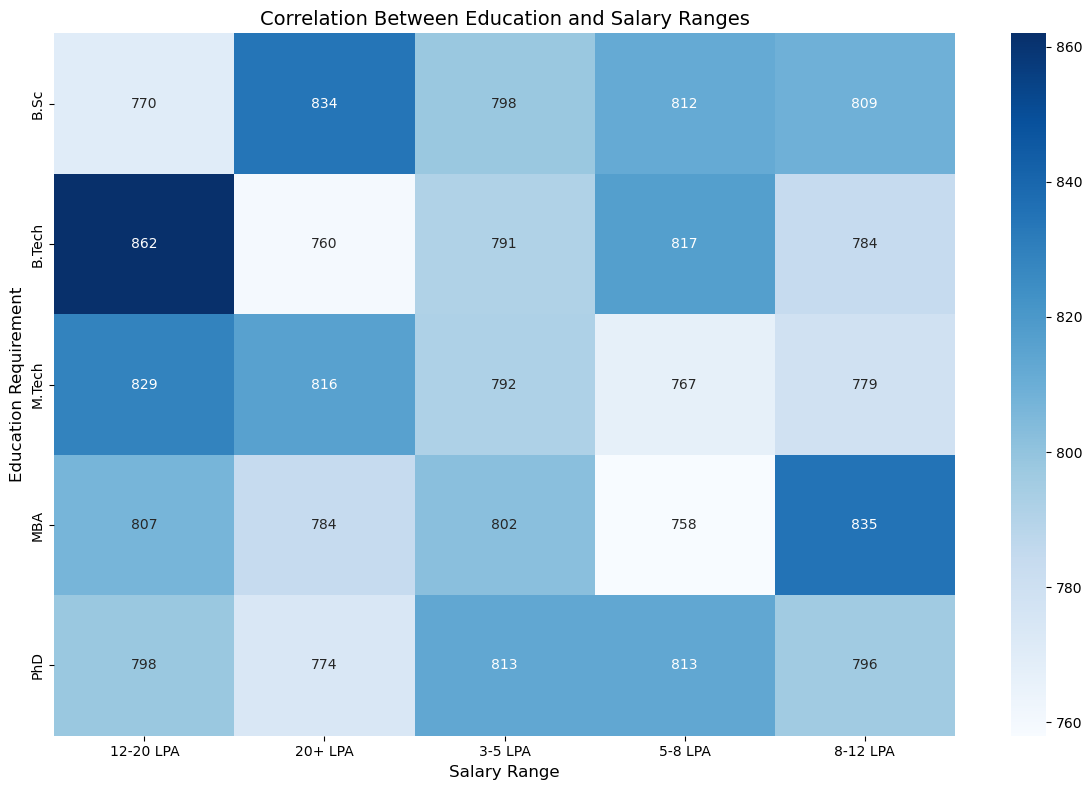

In [112]:
# Group by Education Requirement and Salary Range, then count
education_salary_counts = df.groupby(['Education Requirement', 'Salary Range']).size().unstack()

# Plot a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(education_salary_counts, annot=True, fmt='d', cmap='Blues')
plt.title('Correlation Between Education and Salary Ranges', fontsize=14)
plt.xlabel('Salary Range', fontsize=12)
plt.ylabel('Education Requirement', fontsize=12)
plt.tight_layout()
plt.show()


Which education level is most demanded for different job roles?

                 Job Title Education Requirement  Count
3         Business Analyst                   MBA    425
9   Cyber Security Analyst                   PhD    463
13          Data Scientist                   MBA    402
16       Financial Analyst                B.Tech    421
23        Graphic Designer                   MBA    418
26              HR Manager                B.Tech    422
33     Marketing Executive                   MBA    428
35         Product Manager                  B.Sc    422
41    Sales Representative                B.Tech    427
45       Software Engineer                  B.Sc    421


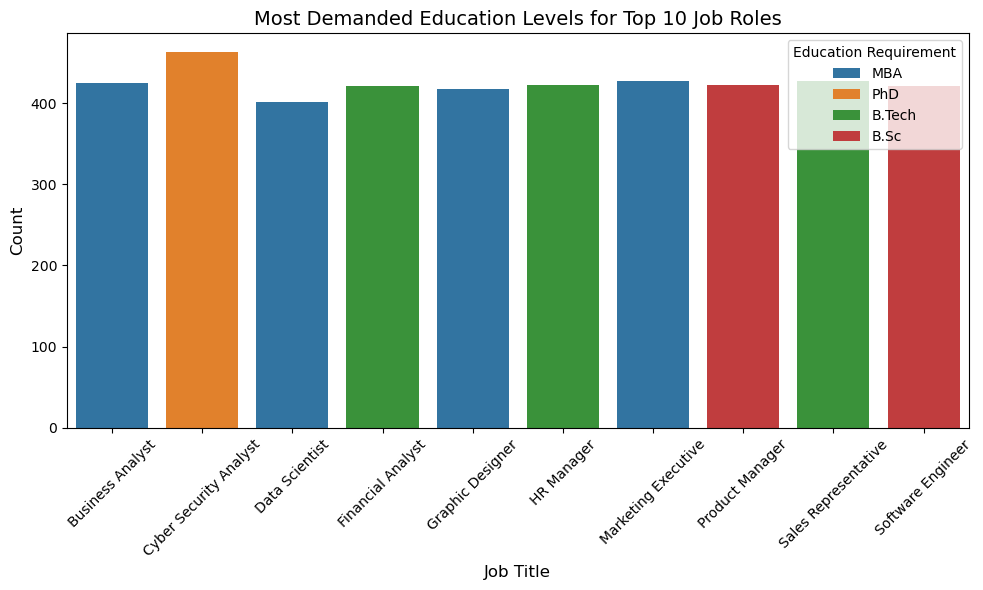

In [114]:
# Group by Job Title and Education Requirement, then count
education_job_counts = df.groupby(['Job Title', 'Education Requirement']).size().reset_index(name='Count')

# Get the most common education level for each job title
most_common_education = education_job_counts.loc[education_job_counts.groupby('Job Title')['Count'].idxmax()]

# Display results
print(most_common_education)

# Optional: Visualize top 10 job titles and their most demanded education levels
top_10_jobs = most_common_education.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_jobs['Job Title'], y=top_10_jobs['Count'], hue=top_10_jobs['Education Requirement'], dodge=False)
plt.title('Most Demanded Education Levels for Top 10 Job Roles', fontsize=14)
plt.xlabel('Job Title', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


How does the number of job postings vary by month? (Line chart of postings over time)

<function matplotlib.pyplot.xticks(ticks: 'ArrayLike | None' = None, labels: 'Sequence[str] | None' = None, *, minor: 'bool' = False, **kwargs) -> 'tuple[list[Tick] | np.ndarray, list[Text]]'>

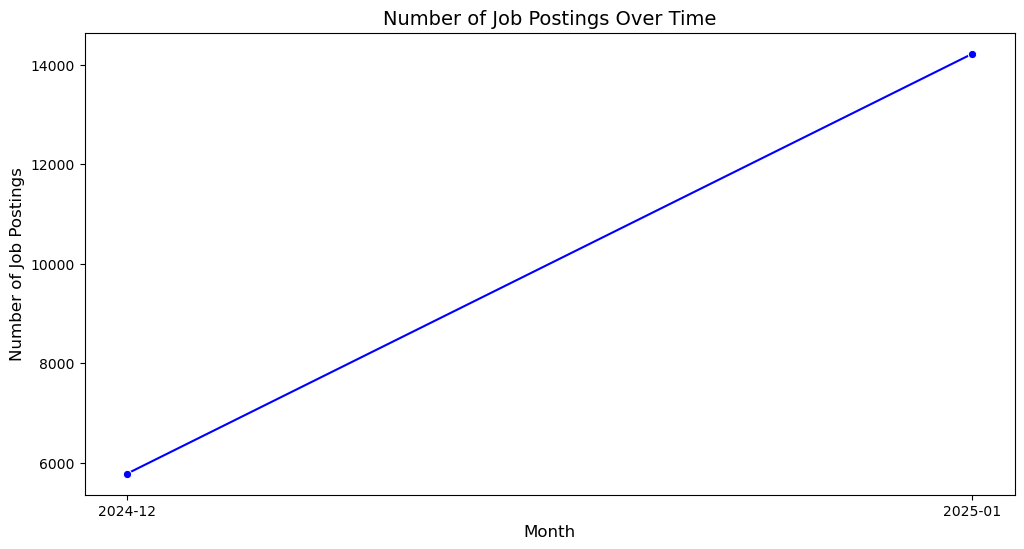

In [122]:
# Convert the Posted Date column to datetime format
df['Posted Date'] = pd.to_datetime(df['Posted Date'])

# Group by month and count job postings
monthly_postings = df['Posted Date'].dt.to_period('M').value_counts().sort_index()

# Plot the results
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_postings.index.astype(str), y=monthly_postings.values, marker='o', color='blue')
plt.title('Number of Job Postings Over Time', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Job Postings', fontsize=12)
plt.xticks


What is the average duration between job posting and application deadline? (Histogram)


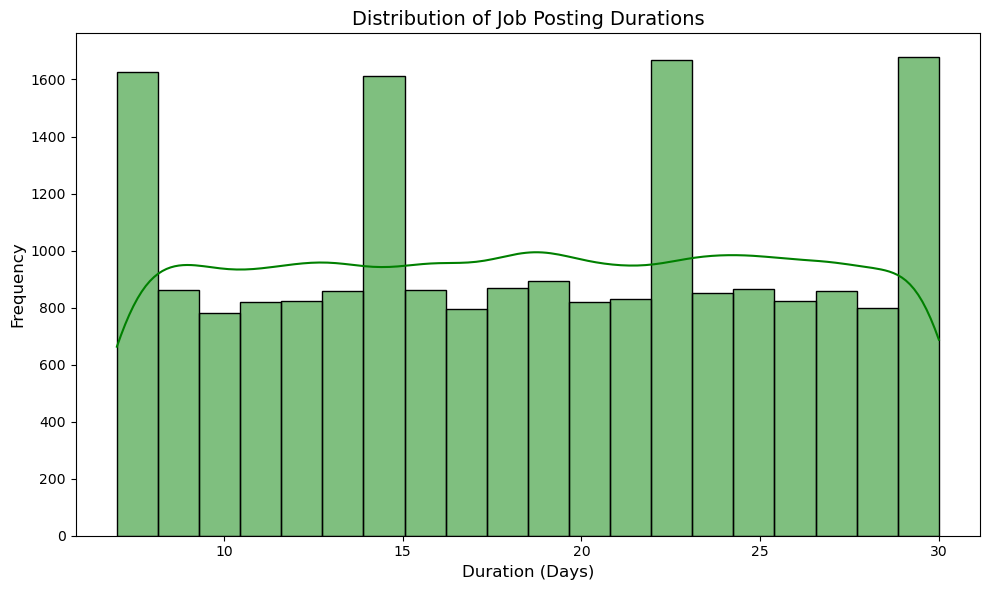

In [126]:
# Convert Application Deadline to datetime format
df['Application Deadline'] = pd.to_datetime(df['Application Deadline'])

# Calculate the duration in days
df['Posting Duration (Days)'] = (df['Application Deadline'] - df['Posted Date']).dt.days

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Posting Duration (Days)'], bins=20, kde=True, color='green')
plt.title('Distribution of Job Posting Durations', fontsize=14)
plt.xlabel('Duration (Days)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()


C:\Users\suhas\AppData\Local\Temp\ipykernel_1540\2768646089.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=portal_applicants.index, y=portal_applicants.values, palette="viridis")


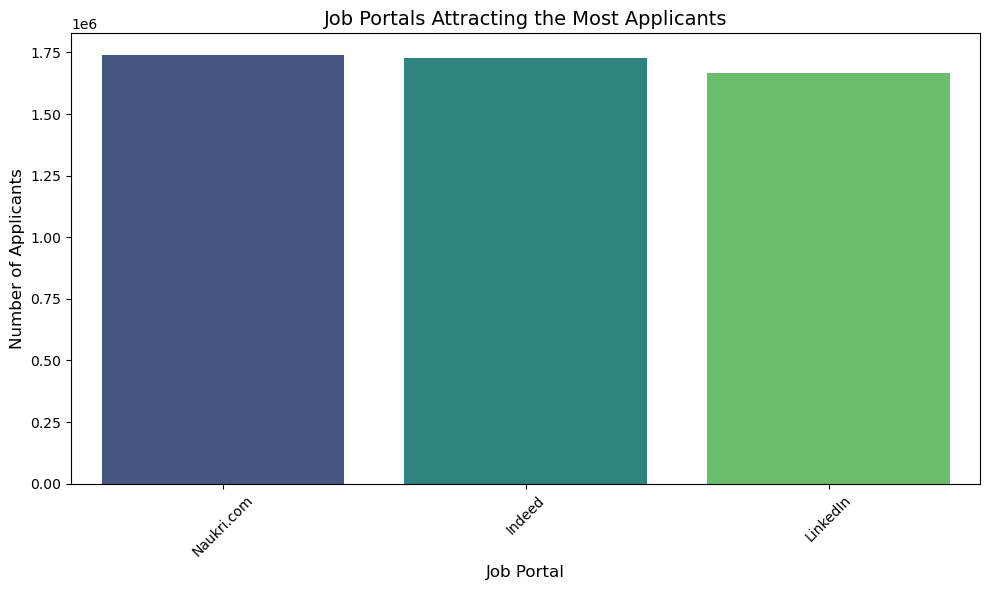

In [128]:
# Group by Job Portal and sum the number of applicants
portal_applicants = df.groupby('Job Portal')['Number of Applicants'].sum().sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=portal_applicants.index, y=portal_applicants.values, palette="viridis")
plt.title('Job Portals Attracting the Most Applicants', fontsize=14)
plt.xlabel('Job Portal', fontsize=12)
plt.ylabel('Number of Applicants', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\suhas\AppData\Local\Temp\ipykernel_1540\3976720515.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_title_applicants.index, y=job_title_applicants.values, palette="viridis")


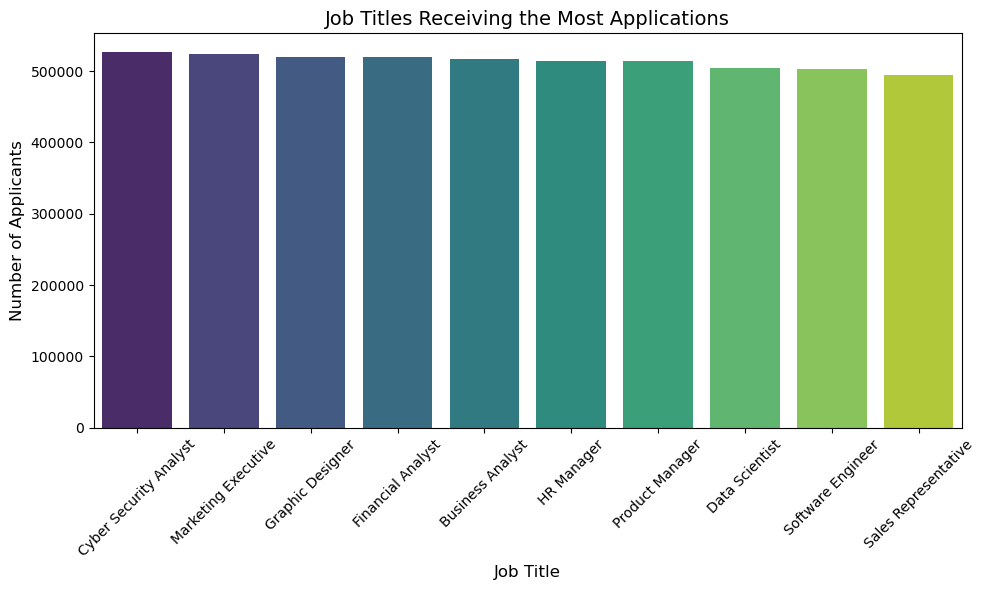

In [130]:
# Group by Job Title and sum the number of applicants
job_title_applicants = df.groupby('Job Title')['Number of Applicants'].sum().sort_values(ascending=False).head(10)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=job_title_applicants.index, y=job_title_applicants.values, palette="viridis")
plt.title('Job Titles Receiving the Most Applications', fontsize=14)
plt.xlabel('Job Title', fontsize=12)
plt.ylabel('Number of Applicants', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


What is the distribution of job postings by company size?

C:\Users\suhas\AppData\Local\Temp\ipykernel_1540\1931510384.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=company_size_counts.index, y=company_size_counts.values, palette="viridis")


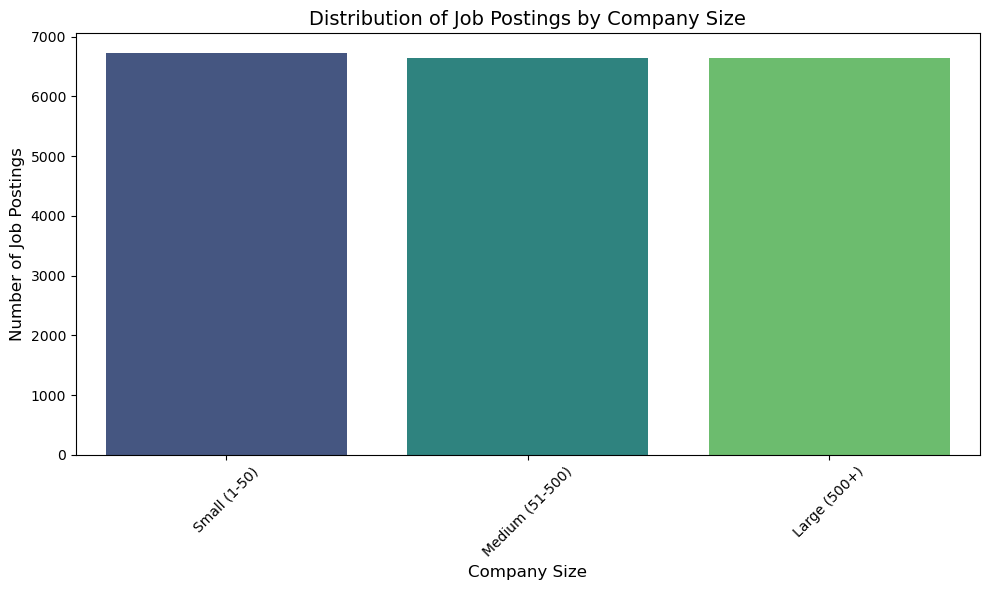

In [134]:
# Count the number of job postings by Company Size
company_size_counts = df['Company Size'].value_counts()

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=company_size_counts.index, y=company_size_counts.values, palette="viridis")
plt.title('Distribution of Job Postings by Company Size', fontsize=14)
plt.xlabel('Company Size', fontsize=12)
plt.ylabel('Number of Job Postings', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\suhas\AppData\Local\Temp\ipykernel_1540\149965043.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=remote_job_counts.index, y=remote_job_counts.values, palette="viridis")


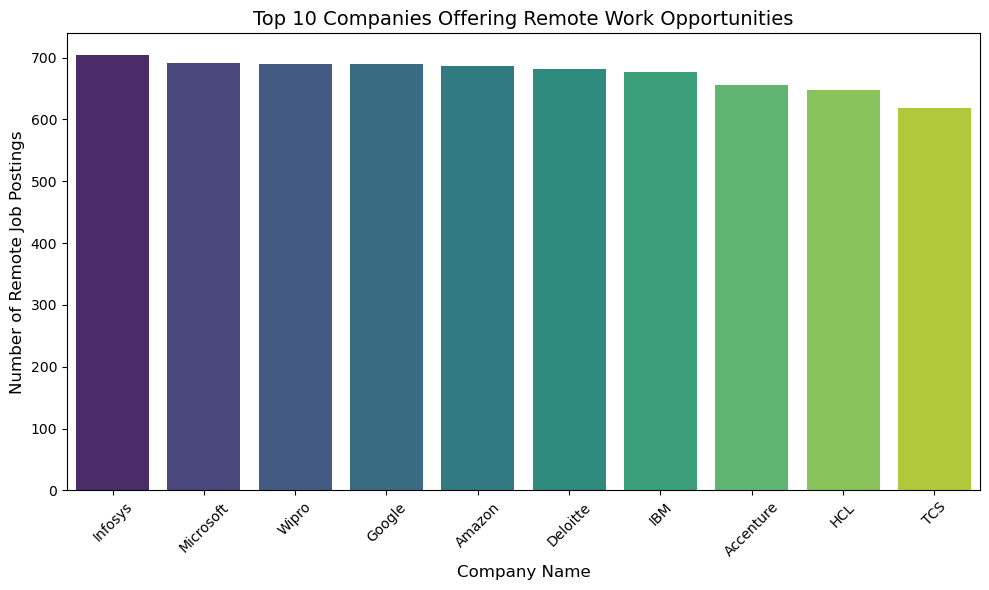

In [136]:
# Filter for Remote Work opportunities
remote_work_data = df[df['Remote/Onsite'] == 'Remote']

# Count job postings by company for remote jobs
remote_job_counts = remote_work_data['Company Name'].value_counts().head(10)  # Top 10 companies

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=remote_job_counts.index, y=remote_job_counts.values, palette="viridis")
plt.title('Top 10 Companies Offering Remote Work Opportunities', fontsize=14)
plt.xlabel('Company Name', fontsize=12)
plt.ylabel('Number of Remote Job Postings', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
